# Week 10 Root finding
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 5.4.2017  
Helsinki Metropolia University of Applied Sciences

In [168]:
# Initial import statements
%pylab inline
from numpy.polynomial.polynomial import polyroots
from scipy.optimize import fsolve

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


___
## From Exercise 9

#### Functions from exercise 1 and their graphical presentations.

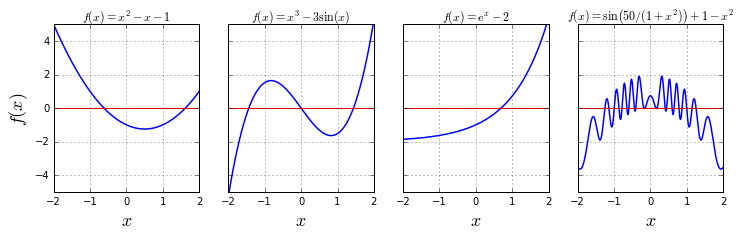

In [169]:
f1 = lambda x: x**2 - x - 1
f2 = lambda x: x**3 - 3 * sin(x)
f3 = lambda x: exp(x) - 2
f4 = lambda x: 1 - x**2 + sin(50 / (1 + x**2))

x = linspace(-2, 2, 1000)
fig, axes = subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f(x), lw=1.5)
    axes[n].axhline(0, color='r')
    axes[n].grid()
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
axes[0].set_ylabel(r'$f(x)$', fontsize=18)
titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$', r'$f(x)=e^x-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

## Exercise 6
Write your own code that implements the Newton-Raphson method.
The function should return the estimate for the root, $x_0$, and the number of iterations. The code should estimate the derivative of the function numerically $f ′(x) = (f(x + h) − f(x))/h$, where h is a small number.
Test that function with the examples given in problem 1 and compare the results to previous results.

## Solution
First we need to define a function that estimate the derivative of function numercially $f ′(x) = (f(x + h) − f(x))\ / \ h$, where h is a small number with default value $10^{-8}$.  
Then we implement the Newton-Raphson algorithm that by each iteration a new estimate of $x_0$ is calculated based on the current values of $x_0, f(x_0), f'(x_0)$. We return the value of the root when $f(x_0)$ falls within the tolerance criteria.  

In [170]:
def derivative(f, x, h = 1e-8):
    """ 
    Inputs:
       f = the function 
       x = point to estimate the derivative on
       h = small number, default value 1e-8
    Outputs:
       df = estimate of the derivative of f at point x
    """
    df = (f(x + h) - f(x)) / h
    return df

def newtonSearch(f, x0, tol = 0.01, maxiter = 200):
    """ 
    Inputs:
       f = the function 
       x0 = initial estimate of a root
       tol = tolerance for the root value
       maxiter = maximum numbers of iterations
    Outputs:
       x0 = estimate for the root
       n = number of iterations
    """
    n = 0
    while(abs(f(x0)) > tol and n < maxiter):
        x0 = x0 - f(x0) / derivative(f, x0)
        n += 1
    return x0, n 


In [171]:
# array of initial guess x0 of each function
fs = [f1, f2, f3, f4]
x0_s = [-2, -2, 2, -1.3]
i = 0
print("Root found by newtonSearch:")
for f in fs:
    i += 1
    x0, n = newtonSearch(f, x0_s[i - 1])
    print("\tFunction f{}:".format(i))
    print("\t\tRoot x0 = {0:.4f}".format(x0))
    print("\t\tNumber of steps n = {}".format(n))

Root found by newtonSearch:
	Function f1:
		Root x0 = -0.6190
		Number of steps n = 3
	Function f2:
		Root x0 = -1.4384
		Number of steps n = 3
	Function f3:
		Root x0 = 0.6932
		Number of steps n = 4
	Function f4:
		Root x0 = -1.2524
		Number of steps n = 1


We could see that the roots found by our `newtonSearch` are similar to the results of previous exercises. We could also notice the number of iterations of `newtonSearch` is less than other methods, however it may depend on our initial guess of $x_0$.

___
## From Exercises 10 

## Exercise 1
Determine the real root of $f(x) = -26 + 85x - 91x^2 + 44x^3 - 8x^4 + x^5$  
(a) Graphically  
(b) Using simple fixed-point iteration  
(c) Using Newton-Raphson method  
(d) Finding the roots of the polynomial  

## Solution
(a) First we plot the function and by using zooming method with `xlim()` and `ylim()` that we have been practicing since week 3, we could easily locate the root graphically at $x_0 = 0.557$.  
(b) First we need to rearrange the function $f(x) = 0$ so that x is on the left-hand side.  

\begin{align}
    f(x) &= 0 \\
    -26 + 85x - 91x^2 + 44x^3 - 8x^4 + x^5 &= 0 \\
    85x &= 26 + 91x^2 - 44x^3 + 8x^4 - x^5 \\
    x &= \frac{26 + 91x^2 - 44x^3 + 8x^4 - x^5}{85} 
\end{align}

From an initial guess $x_0$, we keep calculating new value of $x_{0 new} = g(x_0)$ until the difference between $x_0$ and $x_{0new}$ falls within the tolerance value.  
(c) We already have the `newtonSearch` function from the previous exercise that we could use to find the root of $f(x)$.  
(d) To use `numpy.polynomial.polynomial.polyroots`, we generate an array of coefficients of function $f(x)$. `polyroot` returns an array of roots that contains both real and complex roots. We filter and print out the real root.  
The results we got from 4 above methods are all similar $x_0 = 0.557$.

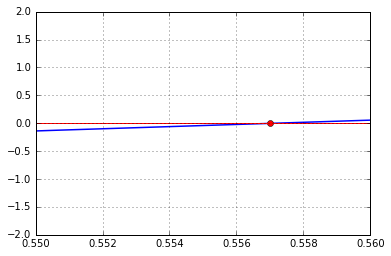

In [172]:
f = lambda x: -26 + 85*x - 91 * x**2 + 44 * x**3 - 8 * x**4 + x**5

# a - solve graphically
x = linspace(-10, 10, 1000)
xlim(0.55, 0.56)
ylim(-2, 2)
plot(x, f(x), lw = 1.5)
plot(0.557, 0, 'ro')
grid()
axhline(0, color='r')
show()

In [173]:
# b - using simple fixed-point iteration
g = lambda x: (26 + 91 * x**2 - 44 * x**3 + 8 * x**4 - x**5) / 85.0

def fixedPoint(g, x0, tol, maxiter=100):
    """
    simple fixed-point iteration algorithm
    """
    e = 1
    n = 0
    while (e > tol and n < maxiter):
        x = g(x0)
        e = abs(x - x0) # calculate error
        x0 = x
        n += 1
    return x0, n

x0, n = fixedPoint(g, 2, tol = 1e-6)
print("Root found by fixedPoint:")
print("\tRoot x0 = {0:.4f}".format(x0))
print("\tNumber of steps n = {}".format(n))


Root found by fixedPoint:
	Root x0 = 0.5570
	Number of steps n = 56


In [174]:
# c - using Newton-Raphson method
x0, n = newtonSearch(f, 1)
print("Root found by newtonSearch:")
print("\tRoot x0 = {0:.4f}".format(x0))
print("\tNumber of steps n = {}".format(n))

Root found by newtonSearch:
	Root x0 = 0.5570
	Number of steps n = 4


In [175]:
# d - using numpy.polynomial.polynomial.polyroots
r = polyroots([-26., 85, -91, 44, -8, 1])
print('Polyroot result: ', r)
print('Real root x0 = {0:.4f}'.format(real(r)[0]))

Polyroot result:  [ 0.55702552+0.j          1.13077604-0.70121119j  1.13077604+0.70121119j
  2.59071120-4.43326974j  2.59071120+4.43326974j]
Real root x0 = 0.5570


___

## Exercise 7
Study the following simultaneous nonlinear equations:  
\begin{align}
    y = -x^2 + x + 0.75 \tag{1}\\
    y + 5xy = x^2 \tag{2}
\end{align}

(a) First manipulate the equations so that you can can draw them in x-y coordinates and graphically find where the roots approximately locate.  
(b) Then find the roots using the fixed-point iteration and good initial guesses.  
(c) Lastly find the roots using `fsolve` or `root` function.  

## Solution
(a) The equation (1) is already in the form $y = f(x)$, but the equation (2) need to be manipulated to get into that form.
\begin{align}
    y + 5xy &= x^2 \tag{2}\\
    y(1 + 5x) &= x^2 \\
    y &= \frac{x^2}{1+5x}
\end{align}

Now we have 2 function $y_1$ and $y_2$ to plot in x-y coordinates and the intersection of 2 functions are the roots of the equations system.  
  
(b) First we need to arrange the equations to the form $x_{new} = g_1(x_0, y_0)$ and $y_{new} = g_2(x_0, y_0)$:  
  
\begin{align}
    y = g_2 = -x^2 + x + 0.75 \tag{1}\\
    \\
    y + 5xy = x^2 \tag{2} \\
    => x = g_1 = \frac{x^2 - y}{5y}
\end{align} 
  
From a good initial guess $(x_0, y_0)$, we keep calculating new value of $x_{new} = g_1(x_0, y_0)$ and $y_{new} = g_2(x_0, y_0)$  until the difference between $x_0$ and $x_{new}$, $y_0$ and $y_{new}$ fall within the tolerance value. 

(c)The find the roots using `fsolve`, first we need to represent the equations system by a vector-based function:  
  
$f([x_0, x_1]) = [-x_0^2 + x_0 - x_1 + 0.75,\ x_0^2 - 5x_0x_1 - x_1 ]$  
where $x_0 = x,\ x_1 = y$.  
  
Then, we call `fsolve` using the function $f$ and an inital guess for the solution vector. 

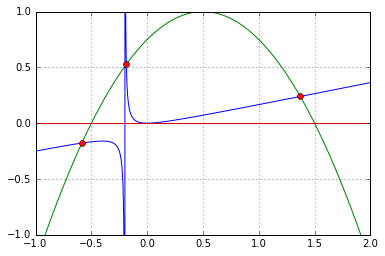

In [176]:
# a - solve graphically
figure()
x = linspace(-1, 2, 1000)
y1 = -x**2 + x + 0.75
y2 = x**2 / (1 + 5*x)
plot(x, y1, 'g')
plot(x, y2, 'b')
plot(-0.1868, 0.528, 'ro')
plot(-0.5853, -0.1778, 'ro')
plot(1.3720,  0.2395, 'ro')
axhline(0, color = 'r')
ylim(-1, 1)
xlim(-1, 2)
grid()
show()



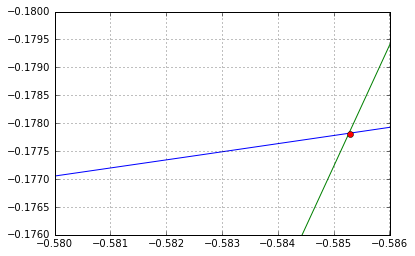

In [177]:
figure()
plot(x, y1, 'g')
plot(x, y2, 'b')
ylim(-0.176, -0.18)
xlim(-0.58, -0.586)
plot(-0.5853, -0.1778, 'ro')
grid()
show()


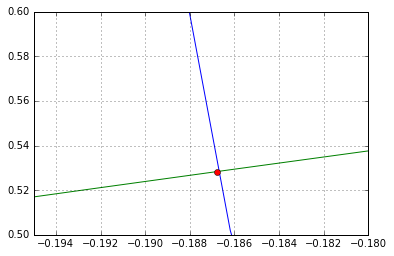

In [178]:
figure()
plot(x, y1, 'g')
plot(x, y2, 'b')
ylim(0.5, 0.6)
xlim(-0.195, -0.18)
plot(-0.1868, 0.528, 'ro')
grid()
show()

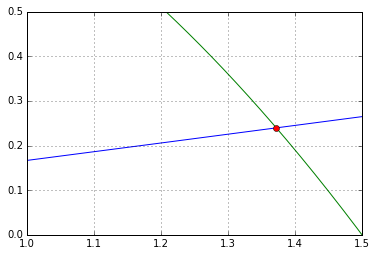

In [179]:
figure()
plot(x, y1, 'g')
plot(x, y2, 'b')
ylim(0, 0.5)
xlim(1, 1.5)
plot(1.3720,  0.2395, 'ro')
grid()
show()

In [180]:
# b - solve using fixed-point iteration
g1 = lambda x, y: (x**2 - y) / (5 * y)
g2 = lambda x, y: -x**2 + x + 0.75

def fixedPoint2Equations(g1, g2, x0, y0, tol=1e-4, maxiter=1000):
    """ 
    simple fixed-point iteration algorithm for system of 2 nonlinear equations
    Inputs:
       g1 = the function that x_i+1 = g1(xi, yi)
       g2 = the function that y_i+1 = g2(xi, yi)
       x0 = initial estimate of x
       y0 = initial estimate of y
       tol = tolerance for the root value
       maxiter = maximum numbers of iterations
    Outputs:
       x0, y0 = estimate for the root
    """
    e = 1
    n = 0
    while (e > tol and n < maxiter):
        x = g1(x0, y0)
        y = g2(x0, y0)
#         print(x, y)
        e = max([abs(x - x0), abs(y - y0)]) # calculate error
        x0, y0 = x, y
        n += 1
    return x0, y0

print("Roots found by fixed-point iteration:")

x0, y0 = fixedPoint2Equations(g1, g2,-0.5853,  -0.1778)
print("\tRoot 1:")
print("\t\tx0 = {0:.6f}".format(x0))
print("\t\ty0 = {0:.6f}".format(y0))

x0, y0 = fixedPoint2Equations(g1, g2, -0.1, 0.5)
print("\tRoot 2:")
print("\t\tx0 = {0:.6f}".format(x0))
print("\t\ty0 = {0:.6f}".format(y0))

x0, y0 = fixedPoint2Equations(g1, g2, 1.3721,  0.2395)
print("\tRoot 3:")
print("\t\tx0 = {0:.6f}".format(x0))
print("\t\ty0 = {0:.6f}".format(y0))


Roots found by fixed-point iteration:
	Root 1:
		x0 = -0.585350
		y0 = -0.177876
	Root 2:
		x0 = -0.186789
		y0 = 0.528299
	Root 3:
		x0 = 1.372157
		y0 = 0.239442


In [181]:
#c - solve using scipy.optimize.fsolve 
def f(x):
    f1 = -x[0]**2 + x[0] - x[1] + 0.75
    f2 = x[0]**2 - 5*x[0]*x[1] - x[1]
    return [f1, f2]

sol1 = fsolve(f, [-0.5 , -0.2])
sol2 = fsolve(f, [-0.1 , 0.5])
sol3 = fsolve(f, [1 , 0.5])
print("Root 1:", sol1)
print("Root 2:", sol2)   
print("Root 3:", sol3)  

Root 1: [-0.5852738  -0.17781921]
Root 2: [-0.18679161  0.52831729]
Root 3: [ 1.37206541  0.23950193]
